# Import All Libraries

In [2]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Layers
from keras.layers import Input, Conv2D, Flatten, Dense

# Preprocsessing
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Model
from keras.models import Model, load_model, Sequential
from keras.models import load_model

# Data Directories

In [2]:
# Train directory
train_dir = "Train" 

# Test directory
test_dir = "Test"

# Apply some data processing and augmantation techniques

In [3]:
# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,  # Rescale the pixel values (normalization) 0 -> 1
    rotation_range = 40,  # Rotate the image in the range -40 - +40
    width_shift_range = 0.2,  # Shift the image with value 20% of the whole width
    height_shift_range = 0.2,  # Shift the image with value 20% of the whole height
    zoom_range = 0.2,  # Zoom in the image by 20% 
    horizontal_flip = True,  # Flip images horizontally
)

# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(
    rescale = 1./255  # Rescale the pixel values (normalization) 0 -> 1
)

# Process the training data

In [4]:
# Create an ImageDataGenerator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the directory containing training images
    target_size=(200, 200),  # Resize images to this target size
    batch_size=64,  # Number of images in each batch
    class_mode='binary'  # Binary classification (true vs false)
)

Found 1649 images belonging to 2 classes.


# Process the testing data

In [5]:
# Create an ImageDataGenerator for training data
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the directory containing training images
    target_size=(200, 200),  # Resize images to this target size
    batch_size=64,  # Number of images in each batch
    class_mode='binary'  # Binary classification (true vs false)
)

Found 500 images belonging to 2 classes.


# Display the images

In [6]:
def display_image_with_label(batch_number, image_index):
    # Display an image from a batch using matplotlib imshow.
    plt.imshow(train_generator[batch_number][0][image_index])
    plt.show()  # Show the image on the screen.

    # Print the label associated with the displayed image.
    print("Label : ", train_generator[batch_number][1][image_index])

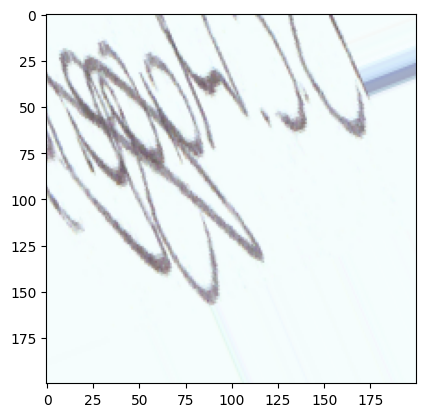

Label :  1.0


In [7]:
display_image_with_label(0, 50)

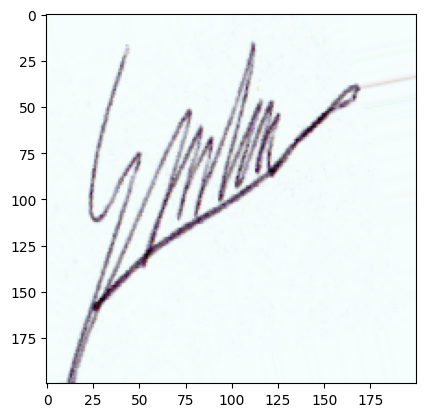

Label :  0.0


In [8]:
display_image_with_label(0, 10)

# Build the model

In [12]:
# Create a Sequential model
model = Sequential([
    # Add convolutional layers
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    
    # Flatten the output of the last convolutional layer
    Flatten(),
    
    # Add dense (fully connected) layers
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model (optional, depending on your needs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 194, 194, 16)      4624      
                                                                 
 flatten_1 (Flatten)         (None, 602176)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               308314624 
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 308324849 (1.15 GB)
Trainable params: 30

# Train the model

In [13]:
# Fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    verbose=2,
)

C:\Users\ahmedkhattab\AppData\Local\Temp\ipykernel_16144\2181251016.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


25/25 - 55s - loss: 4.0536 - accuracy: 0.5697 - 55s/epoch - 2s/step
Epoch 2/10
25/25 - 44s - loss: 0.5502 - accuracy: 0.7338 - 44s/epoch - 2s/step
Epoch 3/10
25/25 - 44s - loss: 0.3962 - accuracy: 0.8416 - 44s/epoch - 2s/step
Epoch 4/10
25/25 - 44s - loss: 0.3494 - accuracy: 0.8700 - 44s/epoch - 2s/step
Epoch 5/10
25/25 - 44s - loss: 0.3039 - accuracy: 0.8959 - 44s/epoch - 2s/step
Epoch 6/10
25/25 - 45s - loss: 0.4933 - accuracy: 0.8972 - 45s/epoch - 2s/step
Epoch 7/10
25/25 - 54s - loss: 0.4473 - accuracy: 0.9306 - 54s/epoch - 2s/step
Epoch 8/10
25/25 - 56s - loss: 0.4999 - accuracy: 0.8776 - 56s/epoch - 2s/step
Epoch 9/10
25/25 - 60s - loss: 0.4121 - accuracy: 0.8738 - 60s/epoch - 2s/step
Epoch 10/10
25/25 - 61s - loss: 0.4216 - accuracy: 0.8959 - 61s/epoch - 2s/step


# Eveluate the model

In [14]:
loss, acc = model.evaluate(test_generator)

8/8 [==============================] - 3s 309ms/step - loss: 0.2854 - accuracy: 0.9460


In [15]:
print(f'Accuracy: {round(acc*100,3)}%')
print(f'Loss: {round(loss,3)}')

Accuracy: 94.6%
Loss: 0.285


In [16]:
y_true = []
y_pred = []

# Using the model to predict the testing data

In [ ]:
for j in range(8):    
    for i in range(64): 
        try:
            plt.imshow(test_generator[j][0][i])
            plt.show()
            
            print("Label : ", "Fake" if test_generator[j][1][i] == 0 else "Real")

            # Expand the dimensions of the input to match the model's expected input shape
            test_input = np.expand_dims(test_generator[j][0][i], axis=0)

            # Predict the output
            pred = model.predict(test_input)

            # Convert prediction to 0 or 1
            pred = int(pred >= 0.5)

            y_true.append(test_generator[j][1][i])
            y_pred.append(pred)

            print("Predict : ", "Fake" if float(pred) == 0 else "Real")
            print("*" * 100)
        except Exception as e:
            pass

# Display the confusion matrix

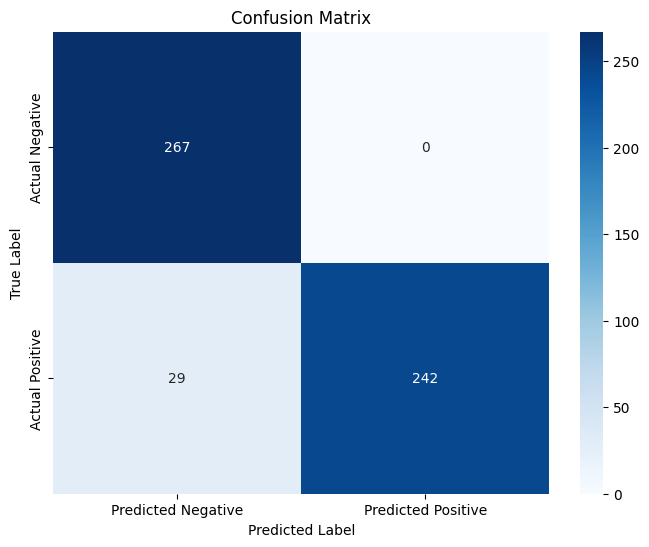

In [19]:
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Save the model

In [20]:
# model.save("signature-verification-model.h5")

# print("Model saved successfully as 'signature-verification-model.h5'")

c:\Users\ahmedkhattab\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully as 'signature-verification-model.h5'
